# `nnetsauce` Examples

Examples of: 
- Multitask, AdaBoost, Deep, Random Bag, Ridge2, Ridge2 Multitask, Nonlinear GLM __classifiers__
- Nonlinear GLM model for __regression__

In [ ]:
!pip install git+https://github.com/techtonique/nnetsauce.git@cythonize --upgrade

Multitask Classifier

In [2]:
import nnetsauce as ns
import numpy as np
from sklearn.datasets import load_breast_cancer, load_wine, load_iris, make_classification
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from time import time


# dataset no. 1 ---------- 

breast_cancer = load_breast_cancer()
Z = breast_cancer.data
t = breast_cancer.target
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

# Linear Regression is used 
regr = LinearRegression()
fit_obj = ns.MultitaskClassifier(regr, n_hidden_features=5, 
                             n_clusters=2, type_clust="gmm")

start = time()
fit_obj.fit(X_train, y_train)
print(time() - start)

print(fit_obj.score(X_test, y_test))
print(fit_obj.score(X_test, y_test, scoring="roc_auc"))

start = time()
preds = fit_obj.predict(X_test)
print(time() - start)
print(metrics.classification_report(preds, y_test))

0.036490678787231445
0.9912280701754386
0.9878048780487805
0.0013403892517089844
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.99      0.99        74

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



AdaBoost

In [3]:
import nnetsauce as ns
import numpy as np
from sklearn.datasets import load_breast_cancer, load_wine, load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from time import time


# dataset no. 1 ----------

# logistic reg
breast_cancer = load_breast_cancer()
Z = breast_cancer.data
t = breast_cancer.target
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

# SAMME
clf = LogisticRegression(solver='liblinear', multi_class = 'ovr', 
                         random_state=123)
fit_obj = ns.AdaBoostClassifier(clf, 
                                n_hidden_features=np.int(56.13806152), 
                                direct_link=True,
                                n_estimators=1000, learning_rate=0.09393372,
                                col_sample=0.52887573, row_sample=0.87781372,
                                dropout=0.10216064, n_clusters=2,
                                type_clust="gmm",
                                verbose=1, seed = 123, 
                                method="SAMME") 

start = time() 
fit_obj.fit(X_train, y_train) 
print(time() - start)
# 29.34
print(fit_obj.score(X_test, y_test))
preds = fit_obj.predict(X_test)                        

print(fit_obj.score(X_test, y_test, scoring="roc_auc"))
print(metrics.classification_report(preds, y_test))

# SAMME.R
clf = LogisticRegression(solver='liblinear', multi_class = 'ovr', 
                         random_state=123)
fit_obj = ns.AdaBoostClassifier(clf, 
                                n_hidden_features=np.int(11.22338867), 
                                direct_link=True,
                                n_estimators=250, learning_rate=0.01126343,
                                col_sample=0.72684326, row_sample=0.86429443,
                                dropout=0.63078613, n_clusters=2,
                                type_clust="gmm",
                                verbose=1, seed = 123, 
                                method="SAMME.R")  
start = time() 
fit_obj.fit(X_train, y_train) 
print(time() - start) 
# 6.906151294708252
print(fit_obj.score(X_test, y_test))
preds = fit_obj.predict(X_test)                        

print(fit_obj.score(X_test, y_test, scoring="roc_auc"))
print(metrics.classification_report(preds, y_test))


# dataset no. 2 ----------

wine = load_wine()
Z = wine.data
t = wine.target
np.random.seed(123)
Z_train, Z_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)


# SAMME
clf = LogisticRegression(solver='liblinear', multi_class = 'ovr', 
                         random_state=123)
fit_obj = ns.AdaBoostClassifier(clf, 
                                n_hidden_features=np.int(8.21154785e+01), 
                                direct_link=True,
                                n_estimators=1000, learning_rate=2.96252441e-02,
                                col_sample=4.22766113e-01, row_sample=7.87268066e-01,
                                dropout=1.56909180e-01, n_clusters=3,
                                type_clust="gmm",
                                verbose=1, seed = 123, 
                                method="SAMME")  
start = time() 
fit_obj.fit(Z_train, y_train) 
print(time() - start)  
# 22.685115098953247
print(fit_obj.score(Z_test, y_test))
preds = fit_obj.predict(Z_test)     
print(metrics.classification_report(preds, y_test))     


# dataset no. 3 ----------

iris = load_iris()
Z = iris.data
t = iris.target
np.random.seed(123)
Z_train, Z_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)


# SAMME.R
clf = LogisticRegression(solver='liblinear', multi_class = 'ovr', 
                         random_state=123)
fit_obj = ns.AdaBoostClassifier(clf, 
                                n_hidden_features=np.int(19.66918945), 
                                direct_link=True,
                                n_estimators=250, learning_rate=0.28534302,
                                col_sample=0.45474854, row_sample=0.87833252,
                                dropout=0.15603027, n_clusters=0,
                                verbose=1, seed = 123, 
                                method="SAMME.R")  
start = time() 
fit_obj.fit(Z_train, y_train)
print(time() - start)    
# 1.413327932357788
print(fit_obj.score(Z_test, y_test))
preds = fit_obj.predict(Z_test)     
print(metrics.classification_report(preds, y_test))  

1000/1000 [██████████████████████████████] - 40s 40ms/step
39.86503982543945
1000/1000 [██████████████████████████████] - 1s 1ms/step
0.9385964912280702
1000/1000 [██████████████████████████████] - 1s 1ms/step
1000/1000 [██████████████████████████████] - 1s 1ms/step
0.9253257601069161
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        38
           1       0.97      0.93      0.95        76

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

250/250 [██████████████████████████████] - 8s 34ms/step
8.471814393997192
250/250 [██████████████████████████████] - 0s 1ms/step
0.9736842105263158
250/250 [██████████████████████████████] - 0s 984us/step
250/250 [██████████████████████████████] - 0s 991us/step
0.9634146341463415
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        



Deep Classifier

In [4]:
import nnetsauce as ns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits


digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=123)


# layer 1 (base layer) ----
layer1_regr = RandomForestClassifier(n_estimators=10, random_state=123)
layer1_regr.fit(X_train, y_train)

# Accuracy in layer 1
print(layer1_regr.score(X_test, y_test))


# layer 2 using layer 1 ----
layer2_regr = ns.CustomClassifier(obj = layer1_regr, n_hidden_features=5, 
                        direct_link=True, bias=True, 
                        nodes_sim='uniform', activation_name='relu', 
                        n_clusters=2, seed=123)
layer2_regr.fit(X_train, y_train)

# Accuracy in layer 2
print(layer2_regr.score(X_test, y_test))


# layer 3 using layer 2 ----
layer3_regr = ns.CustomClassifier(obj = layer2_regr, n_hidden_features=10, 
                        direct_link=True, bias=True, dropout=0.7,
                        nodes_sim='uniform', activation_name='relu', 
                        n_clusters=2, seed=123)
layer3_regr.fit(X_train, y_train)

# Accuracy in layer 3
print(layer3_regr.score(X_test, y_test))

0.9388888888888889
0.9305555555555556
0.9416666666666667


Random Bag Classifier

In [5]:
import nnetsauce as ns
import numpy as np
from sklearn.datasets import load_breast_cancer, load_wine, load_iris, make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from time import time


# dataset no. 1 ---------- 

breast_cancer = load_breast_cancer()
Z = breast_cancer.data
t = breast_cancer.target
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

# decision tree
clf = DecisionTreeClassifier(max_depth=2, random_state=123)
fit_obj = ns.RandomBagClassifier(clf, n_hidden_features=2,
                                direct_link=True,
                                n_estimators=100, 
                                col_sample=0.9, row_sample=0.9,
                                dropout=0.3, n_clusters=0, verbose=0)

start = time()
fit_obj.fit(X_train, y_train)
print(time() - start)
#0.8955960273742676

print(fit_obj.score(X_test, y_test))
print(fit_obj.score(X_test, y_test, scoring="roc_auc"))

start = time()
[fit_obj.fit(X_train, y_train) for _ in range(10)]
print(time() - start)

start = time()
preds = fit_obj.predict(X_test)
print(time() - start)
print(metrics.classification_report(preds, y_test))


# dataset no. 2 ----------

wine = load_wine()
Z = wine.data
t = wine.target
np.random.seed(123)
Z_train, Z_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

clf = DecisionTreeClassifier(max_depth=2, random_state=123)
fit_obj = ns.RandomBagClassifier(clf, n_hidden_features=5,
                                direct_link=True,
                                n_estimators=100, 
                                col_sample=0.5, row_sample=0.5,
                                dropout=0.1, n_clusters=3, 
                                type_clust="gmm", verbose=1)

start = time()
fit_obj.fit(Z_train, y_train)
print(time() - start)
# 1.8651049137115479
print(fit_obj.score(Z_test, y_test))

preds = fit_obj.predict(Z_test)
print(metrics.classification_report(preds, y_test))


# dataset no. 3 ----------

iris = load_iris()
Z = iris.data
t = iris.target
np.random.seed(123)
Z_train, Z_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

clf = LogisticRegression(solver='liblinear', multi_class = 'ovr', 
                         random_state=123)
fit_obj = ns.RandomBagClassifier(clf, n_hidden_features=5,
                                direct_link=False,
                                n_estimators=100, 
                                col_sample=0.5, row_sample=0.5,
                                dropout=0.1, n_clusters=0, verbose=0,
                                n_jobs=1)

start = time()
fit_obj.fit(Z_train, y_train)
print(time() - start)
# 0.4114112854003906
print(fit_obj.score(Z_test, y_test))


# dataset no. 4 ----------

X, y = make_classification(n_samples=2500, n_features=20, 
                                               random_state=783451)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=351452)

clf = DecisionTreeClassifier(max_depth=1, random_state=123)
fit_obj = ns.RandomBagClassifier(clf, n_hidden_features=5,
                                direct_link=True,
                                n_estimators=100, 
                                col_sample=0.5, row_sample=0.5,
                                dropout=0.1, n_clusters=3, 
                                type_clust="gmm", verbose=1)

start = time()
fit_obj.fit(X_train, y_train)
print(time() - start)
# 5.983736038208008
print(fit_obj.score(X_test, y_test))

preds = fit_obj.predict(X_test)
print(metrics.classification_report(preds, y_test))

0.6760439872741699
0.9298245614035088
0.9077848312729703
6.7051355838775635
0.03845643997192383
              precision    recall  f1-score   support

           0       0.83      0.97      0.89        35
           1       0.99      0.91      0.95        79

    accuracy                           0.93       114
   macro avg       0.91      0.94      0.92       114
weighted avg       0.94      0.93      0.93       114

100/100 [██████████████████████████████] - 2s 15ms/step
1.536933422088623
100/100 [██████████████████████████████] - 0s 925us/step
1.0
100/100 [██████████████████████████████] - 0s 892us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        17

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

0.33

Ridge2 Classifier

In [6]:

import nnetsauce as ns
import numpy as np
from sklearn.datasets import load_digits, load_breast_cancer, load_wine, load_iris
from sklearn.model_selection import train_test_split
from time import time


# dataset no. 1 ----------

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# split data into training test and test set
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create the model with nnetsauce
fit_obj = ns.Ridge2Classifier(lambda1 = 6.90185578e+04, 
                             lambda2 = 3.17392781e+02, 
                             n_hidden_features=95, 
                             n_clusters=2, 
                             row_sample = 4.63427734e-01, 
                             dropout = 3.62817383e-01,
                             type_clust = "gmm")

# fit the model on training set
start = time()
fit_obj.fit(X_train, y_train)
print(time() - start)

# get the accuracy on test set
start = time()
print(fit_obj.score(X_test, y_test))
print(time() - start)

# get area under the curve on test set (auc)
print(fit_obj.score(X_test, y_test, scoring="roc_auc"))


# dataset no. 2 ----------

wine = load_wine()
Z = wine.data
t = wine.target
np.random.seed(123)
Z_train, Z_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

# create the model with nnetsauce
fit_obj = ns.Ridge2Classifier(lambda1 = 8.64135756e+04, 
                             lambda2 = 8.27514666e+04, 
                             n_hidden_features=109, 
                             n_clusters=3, 
                             row_sample = 5.54907227e-01, 
                             dropout = 1.84484863e-01,
                             type_clust = "gmm")

# fit the model on training set
fit_obj.fit(Z_train, y_train)

# get the accuracy on test set
print(fit_obj.score(Z_test, y_test))


# dataset no. 3 ----------

iris = load_iris()
Z = iris.data
t = iris.target
np.random.seed(123)
Z_train, Z_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

# create the model with nnetsauce
fit_obj = ns.Ridge2Classifier(lambda1 = 1.87500081e+04, 
                             lambda2 = 3.12500069e+04, 
                             n_hidden_features=47, 
                             n_clusters=3, 
                             row_sample = 7.37500000e-01, 
                             dropout = 1.31250000e-01,
                             type_clust = "gmm")

# fit the model on training set
start = time()
fit_obj.fit(Z_train, y_train)
print(time() - start)

# get the accuracy on test set
start = time()
print(fit_obj.score(Z_test, y_test))
print(time() - start)


# dataset no. 4 ----------

digits = load_digits()
Z = digits.data
t = digits.target
np.random.seed(123)
Z_train, Z_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

# create the model with nnetsauce
fit_obj = ns.Ridge2Classifier(lambda1 = 7.11914091e+04, 
                             lambda2 = 4.63867241e+04, 
                             n_hidden_features=13, 
                             n_clusters=0, 
                             row_sample = 7.65039063e-01, 
                             dropout = 5.21582031e-01,
                             type_clust = "gmm")

# fit the model on training set
fit_obj.fit(Z_train, y_train)

# get the accuracy on test set
print(fit_obj.score(Z_test, y_test))

0.07920622825622559
0.9824561403508771
0.003503561019897461
0.975609756097561
0.9722222222222222
0.04982304573059082
0.9666666666666667
0.0020449161529541016
0.4027777777777778


Ridge2 Multitask Classifier

In [7]:
import nnetsauce as ns
import numpy as np
from sklearn.datasets import load_breast_cancer, load_wine, load_iris, load_digits, make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
from time import time

# dataset no. 1 ---------- 

breast_cancer = load_breast_cancer()
Z = breast_cancer.data
t = breast_cancer.target
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

print(Z.shape)

fit_obj = ns.Ridge2MultitaskClassifier(n_hidden_features=np.int(9.83730469e+01), 
                                   dropout=4.31054687e-01, 
                                   n_clusters=np.int(1.71484375e+00),
                                   lambda1=1.24023438e+01, lambda2=7.30263672e+03)

start = time()
fit_obj.fit(X_train, y_train)
print(time() - start)

print(fit_obj.score(X_test, y_test))
print(fit_obj.score(X_test, y_test, scoring="roc_auc"))


start = time()
preds = fit_obj.predict(X_test)
print(time() - start)
print(metrics.classification_report(preds, y_test))


# dataset no. 2 ----------

wine = load_wine()
Z = wine.data
t = wine.target
np.random.seed(123)
Z_train, Z_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

fit_obj = ns.Ridge2MultitaskClassifier(n_hidden_features=15,
                                  dropout=0.1, n_clusters=3, 
                                  type_clust="gmm")

start = time()
fit_obj.fit(Z_train, y_train)
print(time() - start)

print(fit_obj.score(Z_test, y_test))

preds = fit_obj.predict(Z_test)
print(metrics.classification_report(preds, y_test))


# dataset no. 3 ----------

iris = load_iris()
Z = iris.data
t = iris.target
np.random.seed(123)
Z_train, Z_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)


fit_obj = ns.Ridge2MultitaskClassifier(n_hidden_features=10,
                                  dropout=0.1, n_clusters=2)

start = time()
fit_obj.fit(Z_train, y_train)
print(time() - start)

print(fit_obj.score(Z_test, y_test))


# dataset no. 4 ----------

X, y = make_classification(n_samples=2500, n_features=20, 
                                               random_state=783451)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=351452)


fit_obj = ns.Ridge2MultitaskClassifier(n_hidden_features=5,
                                  dropout=0.1, n_clusters=3, 
                                  type_clust="gmm")

start = time()
fit_obj.fit(X_train, y_train)
print(time() - start)

print(fit_obj.score(X_test, y_test))

preds = fit_obj.predict(X_test)
print(metrics.classification_report(preds, y_test))


# dataset no. 5 ----------

digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=123)

fit_obj = ns.Ridge2MultitaskClassifier(n_hidden_features=25,
                                  dropout=0.1, n_clusters=3, 
                                  type_clust="gmm")

start = time()
fit_obj.fit(X_train, y_train)
print(time() - start)
print(fit_obj.score(X_test, y_test))

start = time()
preds = fit_obj.predict(X_test)
print(time() - start)
print(metrics.classification_report(preds, y_test))

(569, 30)
0.061121225357055664
0.9824561403508771
0.9809555629802873
0.0029571056365966797
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.99      0.99      0.99        73

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

0.014841794967651367
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        17

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

0.030718088150024414
0.9666666666666667
0.11489248275756836
0.89
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       247
  

GLM Regressor with __loss function plot__

  3%|▎         | 3/100 [00:00<00:00, 136.46it/s]


 Example 1 -----

 Elapsed: 0.0810844898223877
[ -0.73001937   1.30493899  -0.91342056   2.66435261  -2.29385707
   4.53590126  -0.41725906  -2.83037167   4.77373817  -1.49580123
  -0.62224408   0.99904679  -1.95016809  -1.71976335   1.71976335
 -13.72750934   0.34705632   8.21592306]
RMSE: 
4.4468474720872635


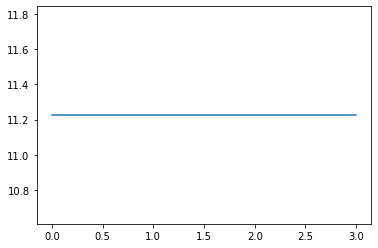

In [8]:
import numpy as np 
import nnetsauce as ns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from time import time
import matplotlib.pyplot as plt


boston = load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2020)

print(f"\n Example 1 -----")
obj2 = ns.GLMRegressor(n_hidden_features=3, 
                       lambda1=1e-2, alpha1=0.5,
                       lambda2=1e-2, alpha2=0.5,
                       optimizer=ns.optimizers.Optimizer(type_optim="sgd"))
start = time()

obj2.fit(X_train, y_train, learning_rate=0.1, batch_prop=0.25, verbose=1)
print(f"\n Elapsed: {time() - start}")
plt.plot(obj2.optimizer.results[2])
print(obj2.beta)
print("RMSE: ")
print(np.sqrt(obj2.score(X_test, y_test))) # RMSE

  3%|▎         | 3/100 [00:00<00:00, 139.11it/s]


 Example 2 -----

 Elapsed: 0.0661919116973877
[ -0.72509388   1.31132796  -0.92205845   2.66757913  -2.29667756
   4.52550514  -0.417997    -2.82410865   4.76906417  -1.49600236
  -0.63232039   0.99090698  -1.94419147  -1.71858575   1.71855068
 -13.725949     0.3426929    8.20576483]
RMSE: 
4.444592994736219


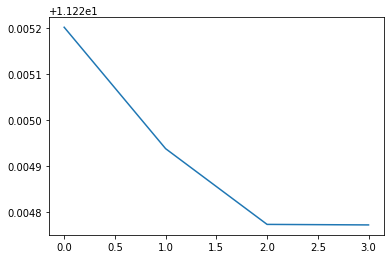

In [9]:
print(f"\n Example 2 -----")
obj2.optimizer.type_optim = "scd"
start = time()
obj2.fit(X_train, y_train, learning_rate=0.01, batch_prop=0.8, verbose=1)
print(f"\n Elapsed: {time() - start}")
plt.plot(obj2.optimizer.results[2])
print(obj2.beta)
print("RMSE: ")
print(np.sqrt(obj2.score(X_test, y_test))) # RMSE

  3%|▎         | 3/100 [00:00<00:00, 156.87it/s]


 Example 3 -----

 Elapsed: 0.06070113182067871
[ -0.73001937   1.30493899  -0.91342056   2.66435261  -2.29385707
   4.53590126  -0.41725906  -2.83037167   4.77373817  -1.49580123
  -0.62224408   0.99904679  -1.95016809  -1.71976335   1.71976335
 -13.72750934   0.34705632   8.21592306]
RMSE: 
4.4468474720872635


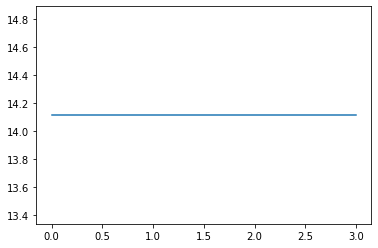

In [10]:
print(f"\n Example 3 -----")
obj2.optimizer.type_optim = "sgd"
obj2.set_params(lambda1=1e-2, alpha1=0.1,
               lambda2=1e-1, alpha2=0.9)
start = time()
obj2.fit(X_train, y_train, batch_prop=0.25, verbose=1)
print(f"\n Elapsed: {time() - start}")
plt.plot(obj2.optimizer.results[2])
print(obj2.beta)
print("RMSE: ")
print(np.sqrt(obj2.score(X_test, y_test))) # RMSE

 22%|██▏       | 22/100 [00:00<00:00, 219.09it/s]


 Example 4 -----


100%|██████████| 100/100 [00:00<00:00, 214.20it/s]



 Elapsed: 0.5153474807739258
[ -0.71067792   1.29690491  -0.68747342   2.3543546   -1.9784566
   4.34896759  -0.37600378  -2.65266734   4.62406064  -1.24187685
  -0.67498569   1.05347135  -2.03899589  -1.28069863   1.31830636
 -11.58438533  -0.06159893   6.69250763]
RMSE: 
4.440806114381907


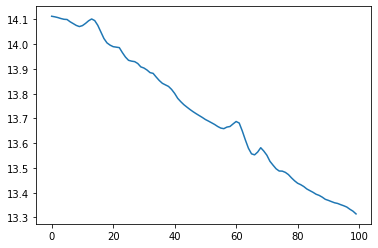

In [11]:
print(f"\n Example 4 -----")
obj2.optimizer.type_optim = "scd"
start = time()
obj2.fit(X_train, y_train, learning_rate=0.01, batch_prop=0.8, verbose=1)
print(f"\n Elapsed: {time() - start}")
plt.plot(obj2.optimizer.results[2])
print(obj2.beta)
print("RMSE: ")
print(np.sqrt(obj2.score(X_test, y_test))) # RMSE 


 Example 5 -----


  3%|▎         | 3/100 [00:00<00:00, 144.21it/s]


 Elapsed: 0.06675028800964355
[ -0.73001937   1.30493899  -0.91342056   2.66435261  -2.29385707
   4.53590126  -0.41725906  -2.83037167   4.77373817  -1.49580123
  -0.62224408   0.99904679  -1.95016809  -1.71976335   1.71976335
 -13.72750934   0.34705632   8.21592306]
RMSE: 
4.4468474720872635


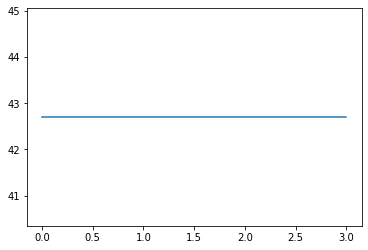

In [12]:
print(f"\n Example 5 -----")
obj2.optimizer.type_optim = "sgd"
obj2.set_params(lambda1=1, alpha1=0.5,
               lambda2=1e-2, alpha2=0.1)
start = time()
obj2.fit(X_train, y_train, learning_rate=0.1, batch_prop=0.5, verbose=1)
print(f"\n Elapsed: {time() - start}")
plt.plot(obj2.optimizer.results[2])
print(obj2.beta)
print("RMSE: ")
print(np.sqrt(obj2.score(X_test, y_test))) # RMSE

  0%|          | 0/100 [00:00<?, ?it/s]


 Example 6 -----


100%|██████████| 100/100 [00:00<00:00, 222.79it/s]



 Elapsed: 0.48998546600341797
[-0.04767637  0.19638247 -0.19408203  0.31171937  0.16231266  2.65354274
 -0.11634894 -0.17232216  0.45971568  0.22730924 -0.66890088  1.10529369
 -1.81068051  1.18481262 -0.20380827 -4.31217738  2.35984521  0.4547747 ]
RMSE: 
5.313346766202479


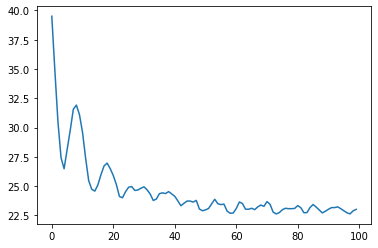

In [13]:
print(f"\n Example 6 -----")
obj2.optimizer.type_optim = "scd"
start = time()
obj2.fit(X_train, y_train, learning_rate=0.1, batch_prop=0.5, verbose=1)
print(f"\n Elapsed: {time() - start}")
plt.plot(obj2.optimizer.results[2])
print(obj2.beta)
print("RMSE: ")
print(np.sqrt(obj2.score(X_test, y_test))) # RMSE

GLM Classifier with __loss function plot__



 method = 'momentum' ----------

 1 - breast_cancer dataset ----------


  3%|▎         | 3/100 [00:00<00:06, 14.21it/s]


0.2432265281677246
0.9736842105263158
0.9741062479117941
0.0013012886047363281
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



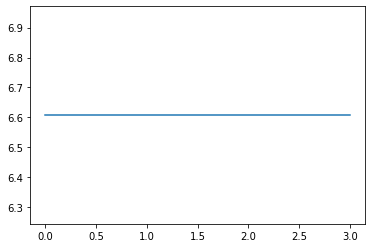

In [14]:
import numpy as np
from sklearn.datasets import load_breast_cancer, load_wine, load_iris, make_classification, load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics
from time import time
import matplotlib.pyplot as plt


print(f"\n method = 'momentum' ----------")


# dataset no. 1 ---------- 

breast_cancer = load_breast_cancer()
Z = breast_cancer.data
t = breast_cancer.target
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

print(f"\n 1 - breast_cancer dataset ----------")
fit_obj = ns.GLMClassifier(n_hidden_features=5, 
                           n_clusters=2, type_clust="gmm")

start = time()
fit_obj.fit(X_train, y_train, verbose=1)
print(time() - start)

plt.plot(fit_obj.optimizer.results[2])

print(fit_obj.score(X_test, y_test))
print(fit_obj.score(X_test, y_test, scoring="roc_auc"))

start = time()
preds = fit_obj.predict(X_test)
print(time() - start)
print(metrics.classification_report(preds, y_test))



  0%|          | 0/100 [00:00<?, ?it/s]


 2 - wine dataset ----------


  3%|▎         | 3/100 [00:00<00:03, 31.12it/s]

0.11235547065734863
1.0
0.0011019706726074219
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



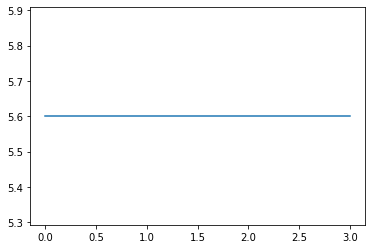

In [15]:
# dataset no. 2 ---------- 

wine = load_wine()
Z = wine.data
t = wine.target
np.random.seed(123575)
X_train, X_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

print(f"\n 2 - wine dataset ----------")
fit_obj = ns.GLMClassifier(n_hidden_features=3, 
                           n_clusters=2, type_clust="gmm")

start = time()
fit_obj.fit(X_train, y_train, verbose=1)
print(time() - start)

plt.plot(fit_obj.optimizer.results[2])

print(fit_obj.score(X_test, y_test))

start = time()
preds = fit_obj.predict(X_test)
print(time() - start)
print(metrics.classification_report(preds, y_test))


  0%|          | 0/100 [00:00<?, ?it/s]


 3 - iris dataset ----------


  3%|▎         | 3/100 [00:00<00:01, 65.44it/s]

0.06327033042907715
1.0
0.0012693405151367188
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



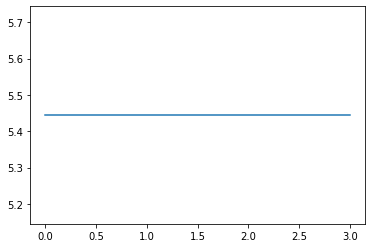

In [16]:
# dataset no. 3 ---------- 

iris = load_iris()
Z = iris.data
t = iris.target
np.random.seed(123575)
X_train, X_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

print(f"\n 3 - iris dataset ----------")
fit_obj = ns.GLMClassifier(n_hidden_features=3, 
                           n_clusters=2, type_clust="gmm")

start = time()
fit_obj.fit(X_train, y_train, verbose=1)
print(time() - start)

plt.plot(fit_obj.optimizer.results[2])

print(fit_obj.score(X_test, y_test))

start = time()
preds = fit_obj.predict(X_test)
print(time() - start)
print(metrics.classification_report(preds, y_test))


  0%|          | 0/100 [00:00<?, ?it/s]


 4 - make_classification dataset ----------


  3%|▎         | 3/100 [00:00<00:12,  8.05it/s]


0.4820847511291504
0.89
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       247
           1       0.93      0.85      0.89       253

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500


 5 - digits dataset ----------


  0%|          | 0/100 [00:00<?, ?it/s]

11.476924180984497
0.9361111111111111
0.003488302230834961
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       1.00      0.85      0.92        40
           2       0.92      0.97      0.94        34
           3       0.94      0.89      0.91        35
           4       0.95      1.00      0.98        40
           5       0.97      1.00      0.99        36
           6       0.95      0.95      0.95        43
           7       1.00      0.89      0.94        35
           8       0.68      0.96      0.79        26
           9       0.96      0.87      0.92        31

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.93       360
weighted avg       0.95      0.94      0.94       360


 method = 'exp' ----------

 1 - breast_cancer dataset ----------


100%|██████████| 100/100 [00:02<00:00, 33.63it/s]


3.022287368774414
0.956140350877193
0.9390243902439024
0.0019712448120117188
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        36
           1       1.00      0.94      0.97        78

    accuracy                           0.96       114
   macro avg       0.94      0.97      0.95       114
weighted avg       0.96      0.96      0.96       114


 method = 'poly' ----------


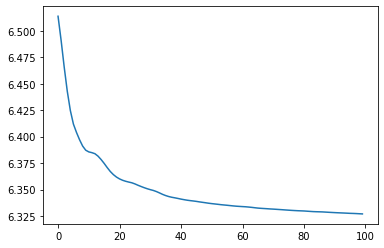

In [17]:
# dataset no. 4 ----------

X, y = make_classification(n_samples=2500, n_features=20, 
                                               random_state=783451)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=351452)

print(f"\n 4 - make_classification dataset ----------")
fit_obj = ns.GLMClassifier(n_hidden_features=5,
                                  dropout=0.1, n_clusters=3, 
                                  type_clust="gmm")

start = time()
fit_obj.fit(X_train, y_train, verbose=1)
print(time() - start)

print(fit_obj.score(X_test, y_test))

preds = fit_obj.predict(X_test)
print(metrics.classification_report(preds, y_test))


# dataset no. 5 ----------

digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=123)

print(f"\n 5 - digits dataset ----------")
fit_obj = ns.GLMClassifier(n_hidden_features=25,
                                  dropout=0.1, n_clusters=3, 
                                  type_clust="gmm")

start = time()
fit_obj.fit(X_train, y_train, verbose=1)
print(time() - start)
print(fit_obj.score(X_test, y_test))

start = time()
preds = fit_obj.predict(X_test)
print(time() - start)
print(metrics.classification_report(preds, y_test))


print(f"\n method = 'exp' ----------")

# dataset no. 1 ---------- 

breast_cancer = load_breast_cancer()
Z = breast_cancer.data
t = breast_cancer.target
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

print(f"\n 1 - breast_cancer dataset ----------")
opt = ns.Optimizer()
opt.set_params(learning_method = "exp")
fit_obj = ns.GLMClassifier(optimizer=opt)
fit_obj.set_params(lambda1=1e-5, lambda2=100)
fit_obj.optimizer.type_optim = "scd"

start = time()
fit_obj.fit(X_train, y_train, verbose=1, learning_rate=0.01, batch_prop=0.5)
print(time() - start)

plt.plot(fit_obj.optimizer.results[2])

print(fit_obj.score(X_test, y_test))
print(fit_obj.score(X_test, y_test, scoring="roc_auc"))

start = time()
preds = fit_obj.predict(X_test)
print(time() - start)
print(metrics.classification_report(preds, y_test))


print(f"\n method = 'poly' ----------")




 1 - breast_cancer dataset ----------


100%|██████████| 100/100 [00:03<00:00, 31.90it/s]


3.188145875930786
0.9824561403508771
0.975609756097561
0.0024595260620117188
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       1.00      0.97      0.99        75

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



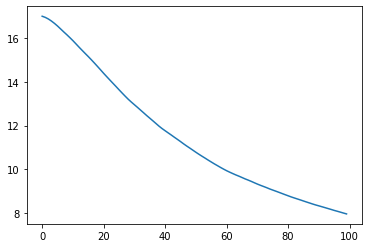

In [18]:
# dataset no. 1 ---------- 

print(f"\n 1 - breast_cancer dataset ----------")
opt = ns.Optimizer()
opt.set_params(learning_method = "poly")
fit_obj = ns.GLMClassifier(optimizer=opt)
fit_obj.set_params(lambda1=1, lambda2=1)
fit_obj.optimizer.type_optim = "scd"

start = time()
fit_obj.fit(X_train, y_train, verbose=1, learning_rate=0.001, batch_prop=0.5)
print(time() - start)

plt.plot(fit_obj.optimizer.results[2])

print(fit_obj.score(X_test, y_test))
print(fit_obj.score(X_test, y_test, scoring="roc_auc"))

start = time()
preds = fit_obj.predict(X_test)
print(time() - start)
print(metrics.classification_report(preds, y_test))